In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json  # 用于将字符串解析为字典
# 读取CSV文件
data = pd.read_csv("/Users/zyt/Desktop/DL_finalproject/BayesianResult/bayesian_result.csv")


In [17]:
print(data.columns)

Index(['iteration', 'strategy', 'train_loss', 'val_loss', 'train_accuracy',
       'val_accuracy', 'training_time', 'total_training_time', 'num_layers',
       'units_per_layer', 'activation', 'learning_rate', 'batch_size',
       'dropout_rate', 'l2_reg_strength'],
      dtype='object')


In [9]:
data['params'] = data['params'].apply(lambda x: json.loads(x.replace("'", "\"")))  # 替换单引号，并提取列表的第一个元素

# 第二步：将字典列展开为独立列
params_df = pd.json_normalize(data['params'])  # 将字典列展开为独立列
data = pd.concat([data, params_df], axis=1).drop(columns=['params'])  # 合并展开后的列

# 查看结果
print("\n解包后的数据：")
print(data)


解包后的数据：
     iteration  strategy  train_loss  val_loss  train_accuracy  val_accuracy  \
0            0  bayesian    0.217970  0.326473       92.633333          90.2   
1            1  bayesian    0.487771  0.445857       86.700000          88.4   
2            2  bayesian    0.189968  0.337659       94.866667          89.8   
3            3  bayesian    0.911337  0.897001       70.233333          70.4   
4            4  bayesian    0.466490  0.426861       86.333333          87.4   
..         ...       ...         ...       ...             ...           ...   
995        995  bayesian    0.415715  0.482681       90.833333          86.8   
996        996  bayesian    0.368458  0.398565       88.400000          88.0   
997        997  bayesian    0.751929  0.551842       75.733333          86.4   
998        998  bayesian    0.229774  0.316139       93.200000          90.2   
999        999  bayesian    0.395092  0.425272       88.233333          87.8   

     training_time  total_trai

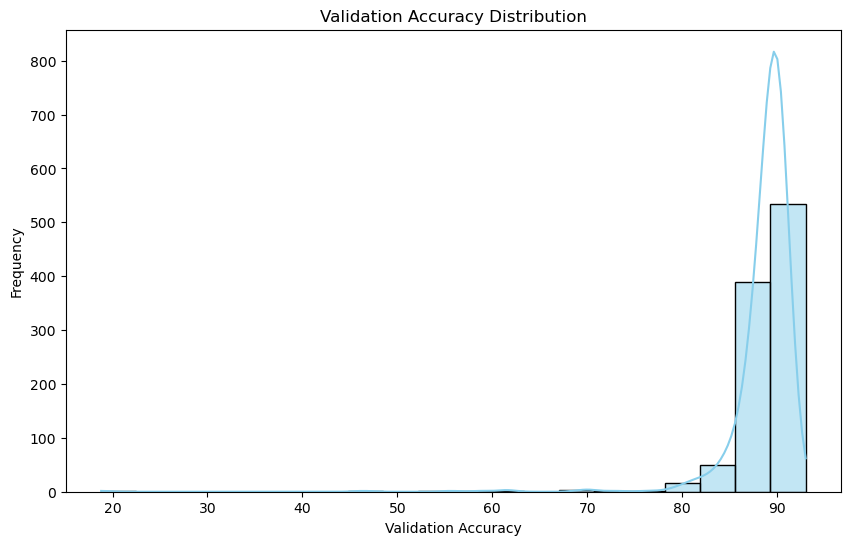

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['val_accuracy'], kde=True, bins=20, color="skyblue")
plt.title("Validation Accuracy Distribution")
plt.xlabel("Validation Accuracy")
plt.ylabel("Frequency")
plt.show()

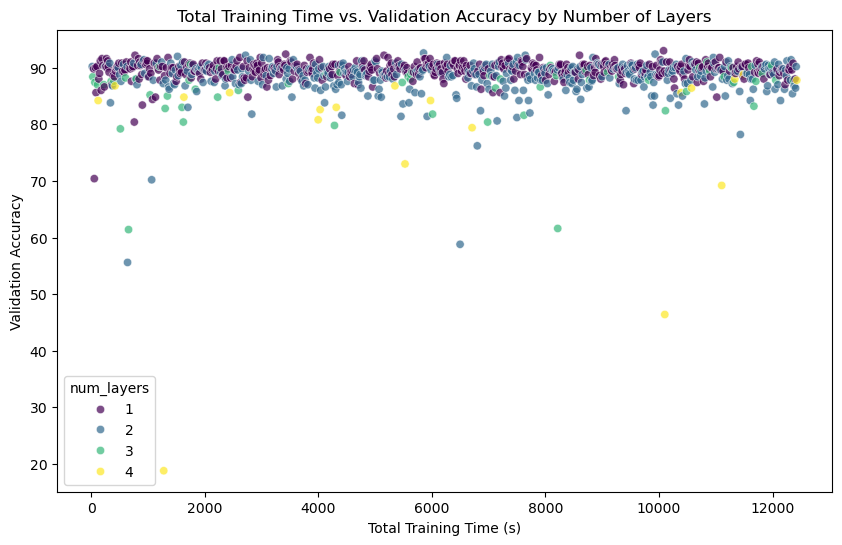

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_training_time', y='val_accuracy', hue='num_layers', data=data, palette="viridis", alpha=0.7)
plt.title("Total Training Time vs. Validation Accuracy by Number of Layers")
plt.xlabel("Total Training Time (s)")
plt.ylabel("Validation Accuracy")
plt.show()

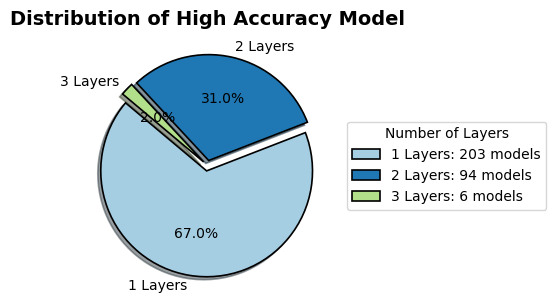

In [29]:
layer_counts = high_accuracy_data['num_layers'].value_counts().sort_index()

# 定义颜色和标题
colors = plt.cm.Paired(range(len(layer_counts)))
explode = [0.05] * len(layer_counts)  # 每个扇区稍微突出

# 绘制饼状图
plt.figure(figsize=(5, 5))
plt.pie(
    layer_counts, labels=[f"{int(label)} Layers" for label in layer_counts.index],
    autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)
plt.title("Distribution of High Accuracy Model", fontsize=14, weight='bold')
plt.legend(title="Number of Layers", loc="center left", bbox_to_anchor=(1, 0.5), labels=[f"{int(label)} Layers: {count} models" for label, count in zip(layer_counts.index, layer_counts)])

plt.tight_layout()
plt.show()